# **Creación de data tabular de la señales fisiológicas obtenidas en los laboratorios**

Las ondas son el producto de acción que se producen durante la estimulación cardiaca y se repiten de un latido a otro,por lo cual tienen las siguientes caracteristicas:
-La primera deflexión negativa va después de la onda Q,que dura menos de 0.03 segundos y abarca menos de 25% de la amplitud de la onda R.Luego la primera deflexión positiva posterior a la onda P es la onda R y la onda S es la primera deflexión negativa después de la onda R,para terminar esta las ondas T y U.Todas estas características se buscaron representar en la señales tomadas para poder analizar el cambio de amplitud de la ondas y su duración,por lo cual cada señal obtenida de ECG fue acotada ya que habían señales que otorgaban información ,oh que tenían mucho ruido por interferencia producido por movimiento del participante o por alguno músculo cercano a los sitios de colocación de los electrodos[1].

Referencia:
[1]	D. A. Moreno and J. Pegueroles, “PROJECTO FINAL DE CARRERA,” Upc.edu. [Online]. Available: https://upcommons.upc.edu/bitstream/handle/2117/98241/Memoria%20PFC.pdf?sequence=1&isAllowed=y. [Accessed: 27-Apr-2023].

In [217]:
#Importación de librerías
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from scipy.signal import firwin, lfilter
#from tqdm import tqdm

import scipy
from IPython.display import display
import sympy

In [218]:
def plot_sig(signal,n,titulo,xlim):
    Fs=1000
    t=n/Fs
    plt.plot(t,signal)
    plt.title("Señal"+titulo)
    plt.xlim(xlim)

In [219]:
#Seleccionamos estilo de ploteo
plt.style.use("ggplot")

In [220]:
def plotear(señal,lim1,lim2):
    plt.plot(señal)
    plt.xlim(lim1,lim2)

## Lectura de los datos

| Señal | array | data | observación
|----------|----------|----------|----------|
| Basal    | array1   | d_sensor1   | d_obs1   |
| Post-Ejercicio    | array2   | d_sensor2   | d_obs2   |
| Respiracion   | array3   | d_sensor3   | d_obs3   |
| RespiracionV2   | array4   | d_sensor4   | d_obs4   |



In [221]:
#Lectura de documento txt con tabulación (/t) como delimitador
array1 = np.genfromtxt("Lab4_Basal.txt", delimiter="\t")
array2 = np.genfromtxt("Lab4_PostEjercicio.txt", delimiter="\t")
array3 = np.genfromtxt("Lab4_Respiracion.txt", delimiter="\t")
array4 = np.genfromtxt("Lab4_RespiracionV2.txt", delimiter="\t")

In [222]:
#Nos quedamos con el dato del sensor
d_sensor1 = -1*array1[:,-2]
d_sensor2 = -1*array2[:,-2]
d_sensor3 = -1*array3[:,-2]
d_sensor4 = -1*array4[:,-2]

## Graficación de los datos

In [223]:
#plotear(d_sensor1,0,5000)

In [224]:
#plotear(d_sensor2,0,5000)

In [225]:
#plotear(d_sensor3,0,5000)

In [226]:
#plotear(d_sensor4,0,5000)

## Especificar la Frecuencia de muestreo 

In [227]:
Fs = 1000 #Frecuencia de muestreo del dispositivo de adquisición
Ts=1/Fs
n1 = np.arange(0,d_sensor1.shape[0])  # t = n*Ts
t1 = n1*Ts

n2 = np.arange(0,d_sensor2.shape[0])  # t = n*Ts
t2 = n2*Ts

n3 = np.arange(0,d_sensor3.shape[0])  # t = n*Ts
t3 = n3*Ts

n4 = np.arange(0,d_sensor4.shape[0])  # t = n*Ts
t4 = n4*Ts

In [228]:
#Ploteamos la señal en el tiempo
#plt.figure(figsize=(13,2)) #Modificamos el tamaño de la gráfica
#plt.plot(t1, d_sensor1)

In [229]:
#plt.figure(figsize=(13,2)) #Modificamos el tamaño de la gráfica
#plt.plot(t1, d_sensor1)

In [230]:
#plt.figure(figsize=(13,2)) #Modificamos el tamaño de la gráfica
#plt.plot(t1, d_sensor1)

In [231]:
#plt.figure(figsize=(13,2)) #Modificamos el tamaño de la gráfica
#plt.plot(t2, d_sensor2)

In [232]:
#plt.figure(figsize=(13,2)) #Modificamos el tamaño de la gráfica
#plt.plot(t3, d_sensor3)

In [233]:
#plt.figure(figsize=(13,2)) #Modificamos el tamaño de la gráfica
#plt.plot(t4, d_sensor4)

## Pasando el array a pandas para trabajarlo como series de tiempo

In [234]:
# Pase de array para trabajar como series de tiempo
#Pasamos las observaciones a filas correspondientes a una variable t y d_sensor
st_sensor1 = np.concatenate((t1.reshape(-1,1),  d_sensor1.reshape(-1,1)), axis=1)
st_sensor2 = np.concatenate((t2.reshape(-1,1),  d_sensor2.reshape(-1,1)), axis=1)
st_sensor3 = np.concatenate((t3.reshape(-1,1),  d_sensor3.reshape(-1,1)), axis=1)
st_sensor4 = np.concatenate((t4.reshape(-1,1),  d_sensor4.reshape(-1,1)), axis=1)

In [235]:
#Creamos el data frame con las varibles t y d_sensor
df1 = pd.DataFrame(st_sensor1, columns=["t","d_sensor1"])
df2 = pd.DataFrame(st_sensor2, columns=["t","d_sensor2"])
df3 = pd.DataFrame(st_sensor3, columns=["t","d_sensor3"])
df4 = pd.DataFrame(st_sensor4, columns=["t","d_sensor4"])

In [236]:
#Establecemos t como index 
df1 = df1.set_index("t")
df2 = df2.set_index("t")
df3 = df3.set_index("t")
df4 = df4.set_index("t")

In [237]:
#Ploteamos la señal
#df1.plot(figsize=(10,3))
#plt.xlim(0,2)


In [238]:
#df2.plot(figsize=(10,3))
#plt.xlim(0.41,0.84)

In [239]:
#df3.plot(figsize=(10,3))
#plt.xlim(0,1.2)

In [240]:
#df4.plot(figsize=(10,3))
#plt.xlim(1,2)

In [241]:
# Pase a data tabular con el estilo Sklearn
n1=df1.index.max()/1
s1=df1.shape[0]/60
#print(n1,s1)

In [242]:
n2=df2.index.max()/1
s2=df2.shape[0]/35
#print(n2,s2)

In [243]:
n3=df3.index.max()/0.6
s3=df3.shape[0]/99
#print(n3,s3)

In [244]:
n4=df4.index.max()/0.6
s4=df4.shape[0]/99
#print(n4,s4)

In [245]:
d_obs1 = df1[["d_sensor1"]].values.reshape(60,705)
#plt.figure(figsize=(13,2))
#plt.plot(d_obs1[0])

In [246]:
d_obs2 = df2[["d_sensor2"]].values.reshape(50,717)
#plt.figure(figsize=(13,2))
#plt.plot(d_obs2[8])

In [247]:
d_obs3 = df3[["d_sensor3"]].values.reshape(99,600)
#plt.figure(figsize=(13,2))
#plt.plot(d_obs3[15])

In [248]:
d_obs4 = df4[["d_sensor4"]].values.reshape(99,600)
#plt.figure(figsize=(13,2))
#plt.plot(d_obs4[6])

## Descripción de categoria de los ejercicios realizado en la clase de ECG

| Descripción | Categoria |
|----------|----------|
| Basal    | 1   |
| Post-Ejercicio    | 2   |
| Respiracion   | 3   | 
| RespiracionV2   | 4   | 



In [249]:
target_1=np.repeat(1,d_obs1.shape[0])
target_2=np.repeat(2,d_obs1.shape[0])
target_3=np.repeat(3,d_obs1.shape[0])
target_4=np.repeat(4,d_obs1.shape[0])

ecg={"1":[d_obs1,target_1],"2":[d_obs2,target_2],"3":[d_obs3,target_3],"4":[d_obs4,target_4]}
ecg


{'1': [array([[-492., -489., -487., ..., -519., -519., -523.],
         [-520., -519., -519., ..., -547., -540., -529.],
         [-527., -530., -535., ..., -529., -537., -545.],
         ...,
         [-543., -537., -529., ..., -545., -543., -545.],
         [-546., -546., -543., ..., -483., -485., -490.],
         [-492., -487., -482., ..., -502., -504., -507.]]),
  array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])],
 '2': [array([[-367., -363., -356., ..., -498., -499., -493.],
         [-488., -484., -481., ..., -519., -521., -515.],
         [-509., -504., -495., ..., -569., -577., -577.],
         ...,
         [-375., -379., -372., ..., -480., -485., -492.],
         [-503., -502., -497., ..., -562., -574., -585.],
         [-584., -575., -567., ..., -516., -512., -508.]]),
  array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2

FIR Hamming

In [250]:
N=1024

## Diseño de filtro pasa baja con enventanado Hamming ##

Fs=1000
M=25
Fc=20
Fs=1000

wc=2*np.pi*Fc/Fs

w=firwin(numtaps=M,cutoff=Fc,window='hamming',fs=Fs)
w=np.round(w,3)

## Creación de nuevo diccionario para señales filtradas FIR por enventanado tipo hamming

ecg_FIR_hamm={}     

for i in ecg:
    conj_señal=ecg[i][0]
    obs=[]
    tar=[]
    for j in conj_señal:
        J=lfilter(w, np.array(1),j)
        obs.append(J)
        tar.append(int(i))

    obs_ar=np.array(obs)
    tar_ar=np.array(tar)
    ecg_FIR_hamm.update({f"{i}":[obs_ar,tar_ar]})
        
#ecg_FIR_hamm


IIR Buttord

In [251]:
N=2**10

wp=2*np.pi*94
ws=2*np.pi*157
# Butterworth:          B.transit   B.pass   B.stop
N_ord, Wc= signal.buttord(wp, ws, gpass=3, gstop=40, analog=True) #gpass=loss in passband edge frecuencies, gstop= attenuation in stopband edge frecuencies 
# Se obtuvieron dos datos: Wc y N_ord
fc = 20

b,a = scipy.signal.butter(N_ord, Wc, 'lowpass', True, 'ba')
bd,ad = signal.bilinear(b,a,Fs)

## Creación de nuevo diccionario para señales filtradas IIR

ecg_IIR_buttord={}     

for i in ecg:
    conj_señal=ecg[i][0]
    obs=[]
    tar=[]
    for j in conj_señal:
        J=scipy.signal.lfilter(bd,ad,j)
        obs.append(J)
        tar.append(int(i))

    obs_ar=np.array(obs)
    tar_ar=np.array(tar)
    ecg_IIR_buttord.update({f"{i}":[obs_ar,tar_ar]})

#ecg_IIR_buttord

PLOTEO DE SEÑALES

In [252]:
signal_basal=ecg["1"][0][0]
signal_resp=ecg["3"][0][0]
signal_post_ej=ecg["2"][0][0]


Mb=len(signal_basal)
nb=np.arange(Mb)

Mr=len(signal_resp)
nr=np.arange(Mr)

Mpe=len(signal_post_ej)
npe=np.arange(Mpe)

In [253]:
signal_basal_FIR=ecg_FIR_hamm["1"][0][0]
signal_resp_FIR=ecg_FIR_hamm["3"][0][0]
signal_post_ej_FIR=ecg_FIR_hamm["2"][0][0]

Mbf=len(signal_basal_FIR)
nbf=np.arange(Mbf)

Mrf=len(signal_resp_FIR)
nrf=np.arange(Mrf)

Mpf=len(signal_post_ej_FIR)
npf=np.arange(Mpf)

In [254]:
signal_basal_IIR=ecg_IIR_buttord["1"][0][0]
signal_resp_IIR=ecg_IIR_buttord["3"][0][0]
signal_post_ej_IIR=ecg_IIR_buttord["2"][0][0]

Mbi=len(signal_basal_IIR)
nbi=np.arange(Mbi)

Mri=len(signal_resp_IIR)
nri=np.arange(Mri)

Mpi=len(signal_post_ej_IIR)
npi=np.arange(Mpi)

PARA BASAL

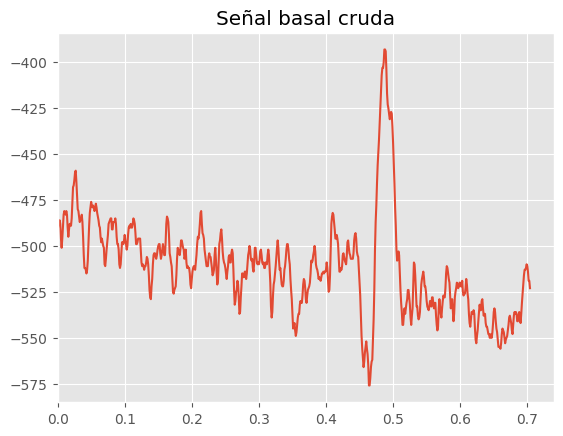

In [255]:
# Señal cruda #

plot_sig(signal_basal,nb," basal cruda",0)

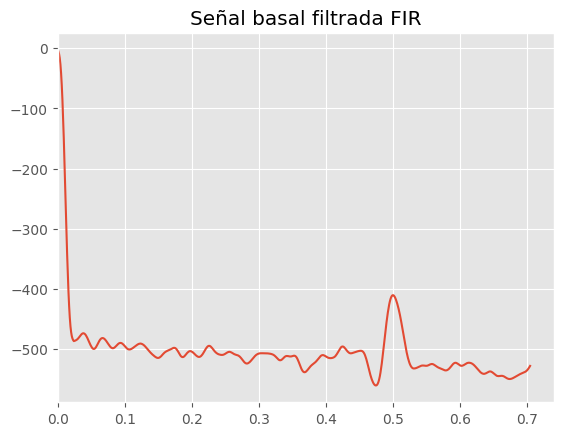

In [256]:
# señal filtrada FIR #
plot_sig(signal_basal_FIR,nbf," basal filtrada FIR",0)

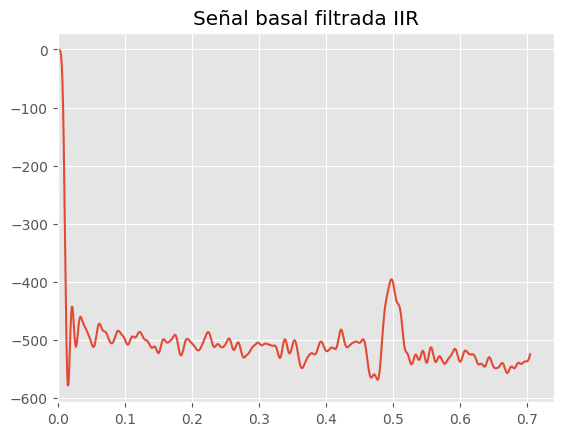

In [257]:
# señal filtrada IIR #
plot_sig(signal_basal_IIR,nbi," basal filtrada IIR",0)

PARA RESPIRACION

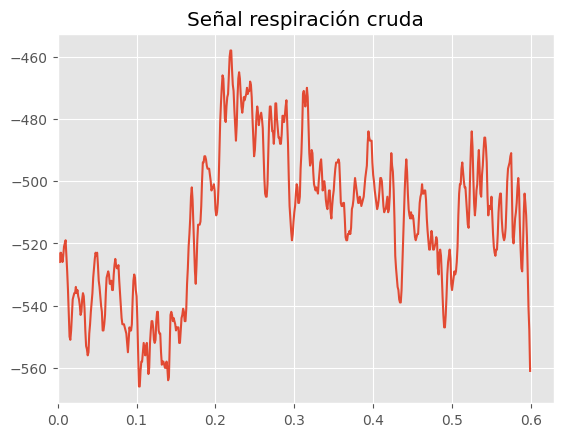

In [258]:
# Señal cruda #

plot_sig(signal_resp,nr," respiración cruda",0)

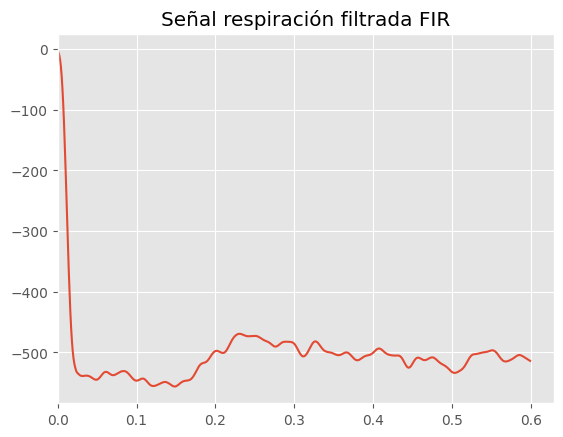

In [259]:
# señal filtrada FIR #
plot_sig(signal_resp_FIR,nrf," respiración filtrada FIR",0)

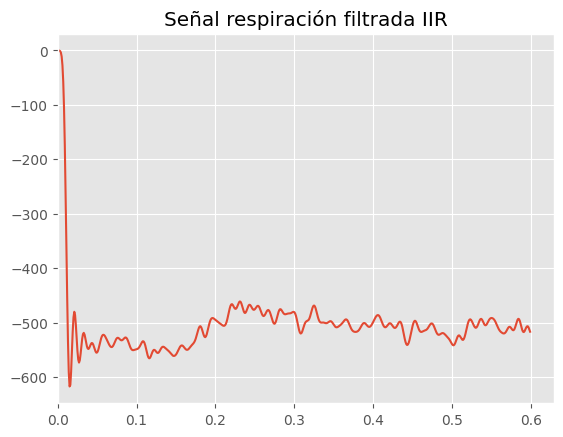

In [260]:
# señal filtrada IIR #
plot_sig(signal_resp_IIR,nri," respiración filtrada IIR",0)

PARA POST EJERCICIO

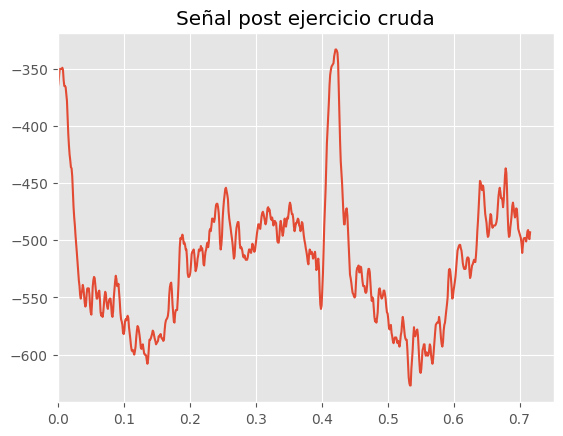

In [261]:
# Señal cruda #

plot_sig(signal_post_ej,npe," post ejercicio cruda",0)

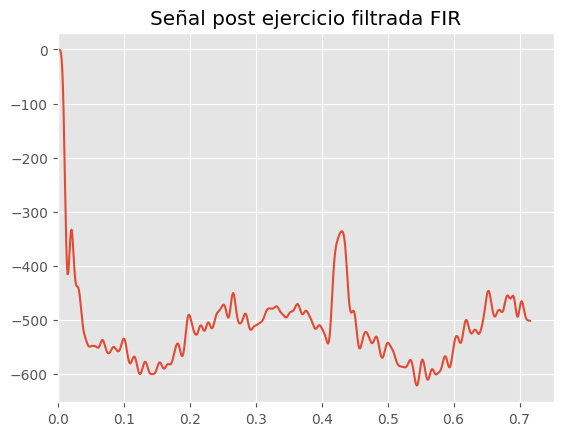

In [262]:
# señal filtrada FIR #
plot_sig(signal_post_ej_IIR,npi," post ejercicio filtrada FIR",0)

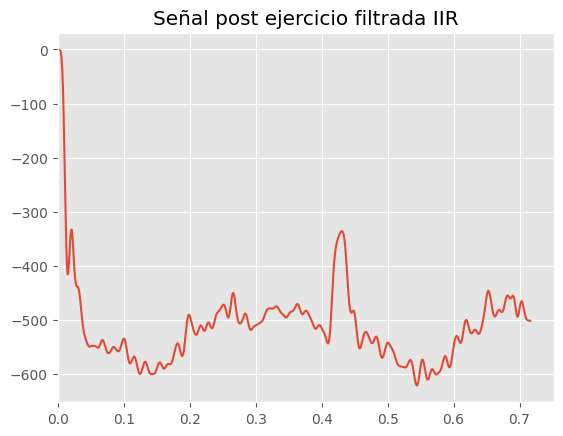

In [263]:
# señal filtrada IIR #
plot_sig(signal_post_ej_IIR,npi," post ejercicio filtrada IIR",0)